<a href="https://colab.research.google.com/github/iscel15/ml-basics/blob/master/Clustering_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this notebook, we separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters.



In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# Read the data
data = pd.read_csv('clusters.csv')
data

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091
...,...,...,...
995,1.035455,1.916280,1.535641
996,3.479744,3.747277,3.038687
997,2.422571,1.771780,1.729732
998,-0.237440,-0.029278,0.077298


Our challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. We should also visualize the clusters to evaluate the level of separation achieved by your model.

Example of aplication: 
[04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

In [3]:
# Define features according to the number of columns
features = data[data.columns[0:2]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

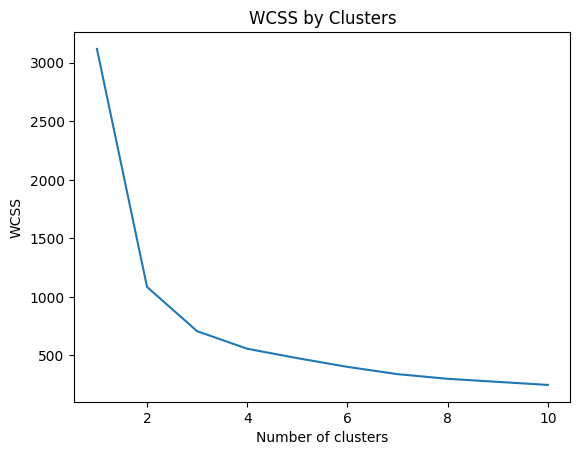

In [4]:
# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Interpretation of the Inertia curve
The curve has an elbow around K = 4. We´ll use 4 clusters to separate our data.

## PCA
We'll use a mathematical technique called Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the three-dimensional feature values into two-dimensional coordinates.

## MinMaxScaler()
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:


```
 X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

```



In [5]:
# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:2]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.3145124 , -0.05531718],
       [ 0.53766685, -0.05993373],
       [-0.19870478,  0.08589647],
       [-0.27609658,  0.11711494],
       [ 0.32757379, -0.16128549],
       [ 0.33697255, -0.06158248],
       [-0.50821462,  0.07102105],
       [-0.1805265 ,  0.10489307],
       [ 0.43967541,  0.13737133],
       [ 0.43271121,  0.01963967]])

In [6]:
# Create a model based on 4 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([3, 3, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 3, 1, 0, 1, 3, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 3, 0, 2, 2, 1, 0,
       1, 3, 3, 1, 1, 2, 3, 0, 2, 1, 1, 1, 2, 0, 2, 3, 3, 0, 3, 3, 1, 2,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 3, 2, 2, 0, 1, 0, 2, 1, 0, 2,
       2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1,
       2, 0, 3, 3, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 3, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 0, 2, 3, 2, 0, 3, 0, 2, 3, 1, 1, 2, 1, 2, 2, 1, 3, 3, 2,
       3, 0, 0, 2, 2, 2, 0, 3, 1, 1, 2, 0, 0, 3, 3, 1, 3, 0, 2, 1, 2, 3,
       0, 2, 0, 3, 1, 3, 2, 0, 2, 1, 3, 2, 1, 0, 0, 3, 0, 0, 1, 0, 2, 2,
       3, 1, 0, 1, 1, 1, 0, 3, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 1, 1, 0, 1,
       2, 3, 3, 1, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 0, 1, 3, 0, 0, 1, 2, 0, 0, 1, 1, 1, 3, 1, 3, 2, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0, 0, 3, 1,
       1, 0, 1, 3, 3, 0, 3, 1, 1, 1, 2, 2, 0, 3, 2,


Let's see those cluster assignments with the three-dimensional data points.

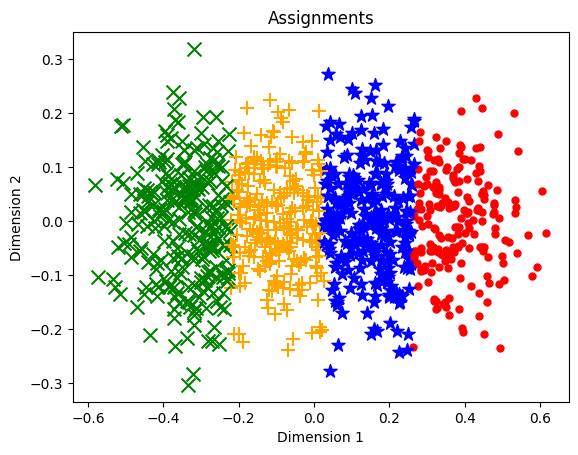

In [7]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

## Hierarchical Clustering
Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so.

Hierarchical clustering creates clusters by either a divisive method or agglomerative method. The divisive method is a "top down" approach starting with the entire dataset and then finding partitions in a stepwise manner. Agglomerative clustering is a "bottom up** approach. In this lab you will work with agglomerative clustering which roughly works as follows:

The linkage distances between each of the data points is computed.
Points are clustered pairwise with their nearest neighbor.
Linkage distances between the clusters are computed.
Clusters are combined pairwise into larger clusters.
Steps 3 and 4 are repeated until all data points are in a single cluster.
The linkage function can be computed in a number of ways:

Ward linkage measures the increase in variance for the clusters being linked,
Average linkage uses the mean pairwise distance between the members of the two clusters,
Complete or Maximal linkage uses the maximum distance between the members of the two clusters.
Several different distance metrics are used to compute linkage functions:

Euclidian or l2 distance is the most widely used. This metric is only choice for the Ward linkage method.
Manhattan or l1 distance is robust to outliers and has other interesting properties.
Cosine similarity, is the dot product between the location vectors divided by the magnitudes of the vectors. Notice that this metric is a measure of similarity, whereas the other two metrics are measures of difference. Similarity can be quite useful when working with data such as images or text documents.

## Agglomerative Clustering
Let's see an example of clustering the seeds data using an agglomerative clustering algorithm.

In [8]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([3, 3, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 0, 2, 0, 1, 3, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 3, 0, 2, 2, 1, 0,
       1, 3, 3, 1, 1, 2, 3, 0, 2, 1, 1, 1, 2, 0, 2, 3, 3, 0, 3, 3, 2, 2,
       0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 0, 1, 2, 2, 1, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1,
       2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 3, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 3, 0, 0, 3, 1, 1, 2, 1, 2, 2, 1, 3, 0, 2,
       3, 0, 0, 2, 2, 2, 0, 3, 1, 1, 2, 0, 0, 3, 3, 1, 3, 0, 0, 1, 2, 3,
       0, 2, 0, 3, 1, 3, 2, 0, 0, 1, 3, 2, 1, 2, 0, 3, 0, 0, 1, 0, 2, 2,
       3, 1, 0, 1, 1, 1, 0, 3, 2, 2, 1, 0, 2, 2, 0, 3, 1, 2, 2, 1, 0, 1,
       2, 3, 3, 1, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3, 1, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 3, 0, 2, 1, 2, 0, 0, 1, 1, 1, 3, 2, 3, 2, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 3, 3, 2,
       1, 0, 1, 3, 3, 0, 3, 2, 2, 1, 0, 2, 0, 3, 2,

And now we plot the results. Showing some differences with the previous clustering.

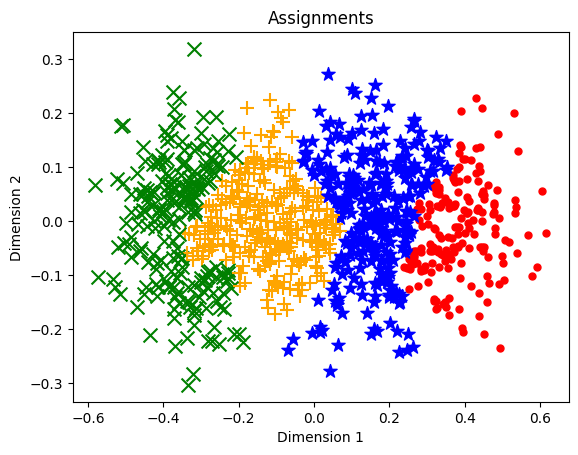

In [9]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)